ya karena saya pusing ya fren, jadi bikin satu file lagi (:

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p
import matplotlib.image as im

In [2]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')

df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,16,21,10,2023,PSS Sleman,2,8,1,19,Persik Kediri,2,9,1,20,Maguwoharjo,Sleman
140,16,21,10,2023,Borneo FC Samarinda,1,8,1,32,Persib Bandung,1,9,1,28,Segiri,Samarinda
141,16,22,10,2023,Persita Tangerang,2,9,3,18,Persis Solo,1,9,0,20,Indomilk Arena,Tangerang
142,16,22,10,2023,Madura United FC,1,8,0,30,Dewa United FC,4,8,3,24,Gelora Madura Ratu Pamelingan,Pamekasan


In [3]:
# di-run buat keterangan aja
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

# tables at certain gameweek

In [3]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [4]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=16 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ]
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])
    
    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
    except:
        week = len(df.loc[(df['home']==cl)|(df['away']==cl)]['week'])
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==week) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(week)
points

[27, 20, 28, 24, 23, 29, 20, 27, 20, 19, 13, 22, 21, 18, 32, 30, 7, 10]

## home-away pairs

In [5]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
dff

hscore  ascore  hpoint  apoint
home              away                                               
Arema FC          Bali United FC            1       3       0       3
                  Borneo FC Samarinda       0       1       0       3
                  PS Barito Putera          0       4       0       3
                  PSS Sleman                2       1       3       0
                  Persib Bandung            3       3       1       1
...                                       ...     ...     ...     ...
Rans Nusantara FC PSS Sleman                0       0       1       1
                  Persik Kediri             1       0       3       0
                  Persikabo 1973            2       1       3       0
                  Persis Solo               1       2       0       3
                  Persita Tangerang         0       1       0       3

[144 rows x 4 columns]

## tables

In [6]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})

tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32
2,Madura United FC,16,9,3,4,29,20,9,30
3,Rans Nusantara FC,16,8,5,3,21,15,6,29
4,Persib Bandung,16,7,7,2,30,21,9,28
5,PSIS Semarang,16,8,3,5,24,18,6,27
6,Bali United FC,16,8,3,5,26,21,5,27
7,Dewa United FC,16,6,6,4,24,19,5,24
8,PS Barito Putera,16,6,5,5,23,16,7,23
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22
10,PSM Makassar,16,6,3,7,19,17,2,21


## sort head-to-head points

In [7]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):
    
    try:
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            
            if len(game)==1:
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']

                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                
            if i1scr < i2scr:
                #sh.at[i,'pr']=sh['pr'][i]-1
                #sh.at[i+1,'pr']=sh['pr'][i+1]+1
                temp1, temp2 = sh.loc[i].copy(), sh.loc[i+1].copy()
                sh.loc[i],sh.loc[i+1] = temp2, temp1
        
    except:
        pass
        
sh

,Clubs,Points,pr
1,Borneo FC Samarinda,32,18
2,Madura United FC,30,17
3,Rans Nusantara FC,29,16
4,Persib Bandung,28,15
5,PSIS Semarang,27,14
6,Bali United FC,27,13
7,Dewa United FC,24,12
8,PS Barito Putera,23,11
9,Persebaya Surabaya,22,10
10,PSM Makassar,21,9


check standings resulted from priority fixing before sort_values command!

In [9]:
#sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
#sh

,Clubs,Points,pr
0,Borneo FC Samarinda,31,18
1,Madura United FC,30,17
2,Persib Bandung,27,16
3,Rans Nusantara FC,26,15
4,PSIS Semarang,24,14
5,Bali United FC,24,13
6,PS Barito Putera,22,12
7,Persebaya Surabaya,22,11
8,Dewa United FC,21,10
9,Persija Jakarta,20,9


# points earned or lost at

In [8]:
homepoints  = []
awaypoints  = []
totalpoints = []

for cl in sh['Clubs']:
    
    hpe  = df.loc[(df['home']==cl)]['hpoint'].sum()
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    awaypoints.append(ape)
    
    totalpoints.append(hpe+ape)

In [9]:
yep = pd.DataFrame({
    'Club': sh['Clubs'],
    'Home Points': homepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
})
yep

,Club,Home Points,Away Points,Total Points
1,Borneo FC Samarinda,20,12,32
2,Madura United FC,16,14,30
3,Rans Nusantara FC,14,15,29
4,Persib Bandung,13,15,28
5,PSIS Semarang,19,8,27
6,Bali United FC,19,8,27
7,Dewa United FC,15,9,24
8,PS Barito Putera,16,7,23
9,Persebaya Surabaya,14,8,22
10,PSM Makassar,12,9,21


In [10]:
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,Away Points,Total Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32,20,12,32
2,Madura United FC,16,9,3,4,29,20,9,30,16,14,30
3,Rans Nusantara FC,16,8,5,3,21,15,6,29,14,15,29
4,Persib Bandung,16,7,7,2,30,21,9,28,13,15,28
5,PSIS Semarang,16,8,3,5,24,18,6,27,19,8,27
6,Bali United FC,16,8,3,5,26,21,5,27,19,8,27
7,Dewa United FC,16,6,6,4,24,19,5,24,15,9,24
8,PS Barito Putera,16,6,5,5,23,16,7,23,16,7,23
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22,14,8,22
10,PSM Makassar,16,6,3,7,19,17,2,21,12,9,21


Text(0, 19.2, 'source: Liga Indonesia Baru')

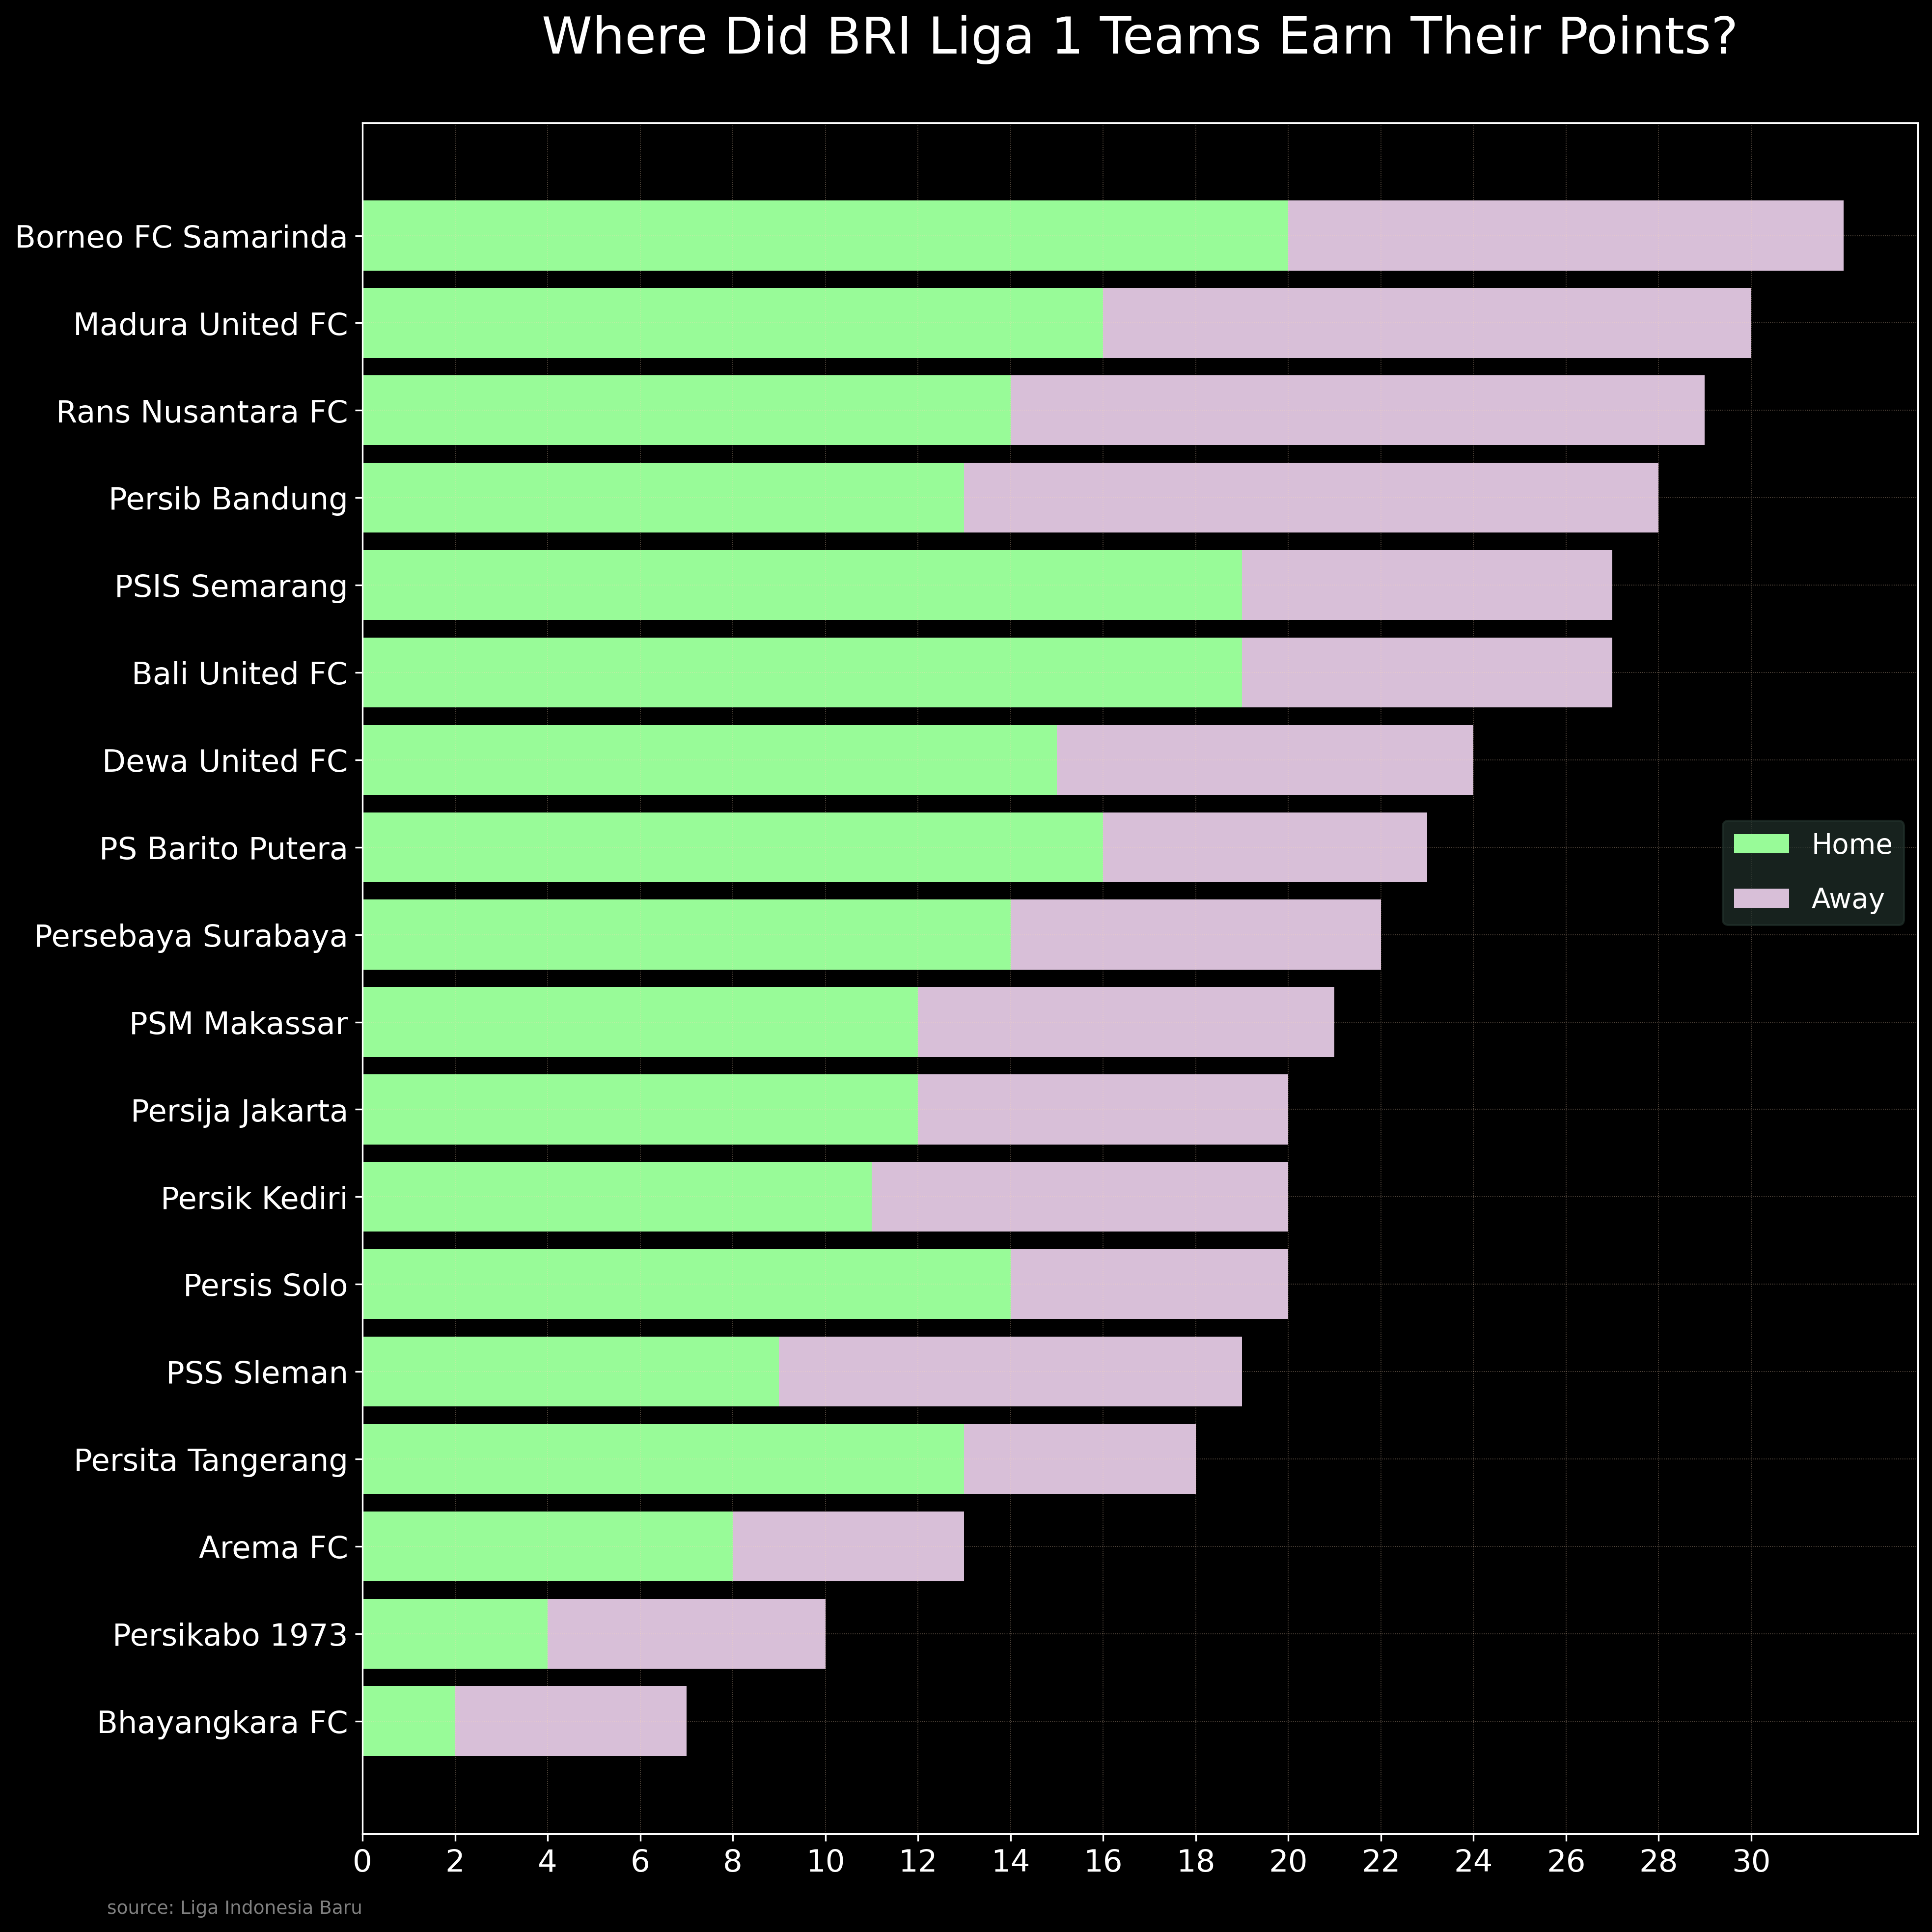

In [11]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, yep['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, yep['Away Points'], left=yep['Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')


## standings breakdown

In [13]:
hpefr=[]
fhpefr=[]
apefr=[]
hpewdt=[]
fhpewdt=[]
apewdt=[]
iy=merg['Clubs'][6] # club's position
for i in (1, 7, 13):
    hmask=(df['home']==iy) & (df['away'].isin(merg['Clubs'].loc[i:(i+5)]))
    amask=(df['away']==iy) & (df['home'].isin(merg['Clubs'].loc[i:(i+5)]))
    mask=df.loc[hmask|amask]
    
    hpefr.append(mask.loc[mask['home']==iy]['hpoint'].sum())
    apefr.append(mask.loc[(mask['away']==iy)]['apoint'].sum())
    
    hpewdt.append(mask.loc[mask['home']==iy].shape[0]*3)
    apewdt.append(mask.loc[(mask['away']==iy)].shape[0]*3)

yasip = pd.DataFrame({
    'Club':iy,
    'Home Point 1-6':hpefr[0],
    'Home Point 7-12':hpefr[1],
    'Home Point 13-18':hpefr[2],
    'Home Width 1-6':hpewdt[0],
    'Home Width 7-12':hpewdt[1],
    'Home Width 13-18':hpewdt[2],
    'Away Point 1-6':apefr[0],
    'Away Point 7-12':apefr[1],
    'Away Point 13-18':apefr[2],
    'Away Width 1-6':apewdt[0],
    'Away Width 7-12':apewdt[1],
    'Away Width 13-18':apewdt[2],
}, index=[0])
yasip

,Club,Home Point 1-6,Home Point 7-12,Home Point 13-18,Home Width 1-6,Home Width 7-12,Home Width 13-18,Away Point 1-6,Away Point 7-12,Away Point 13-18,Away Width 1-6,Away Width 7-12,Away Width 13-18
0,Persebaya Surabaya,5,3,3,9,3,6,0,1,6,3,6,6


In [30]:
layout = [#["logo"] + ["club"] * 2,
          ["text"] * 3,
          ["pos"] + ["hbar"] + ["abar"],
          ["pos"] + ["hbar"] + ["abar"]]

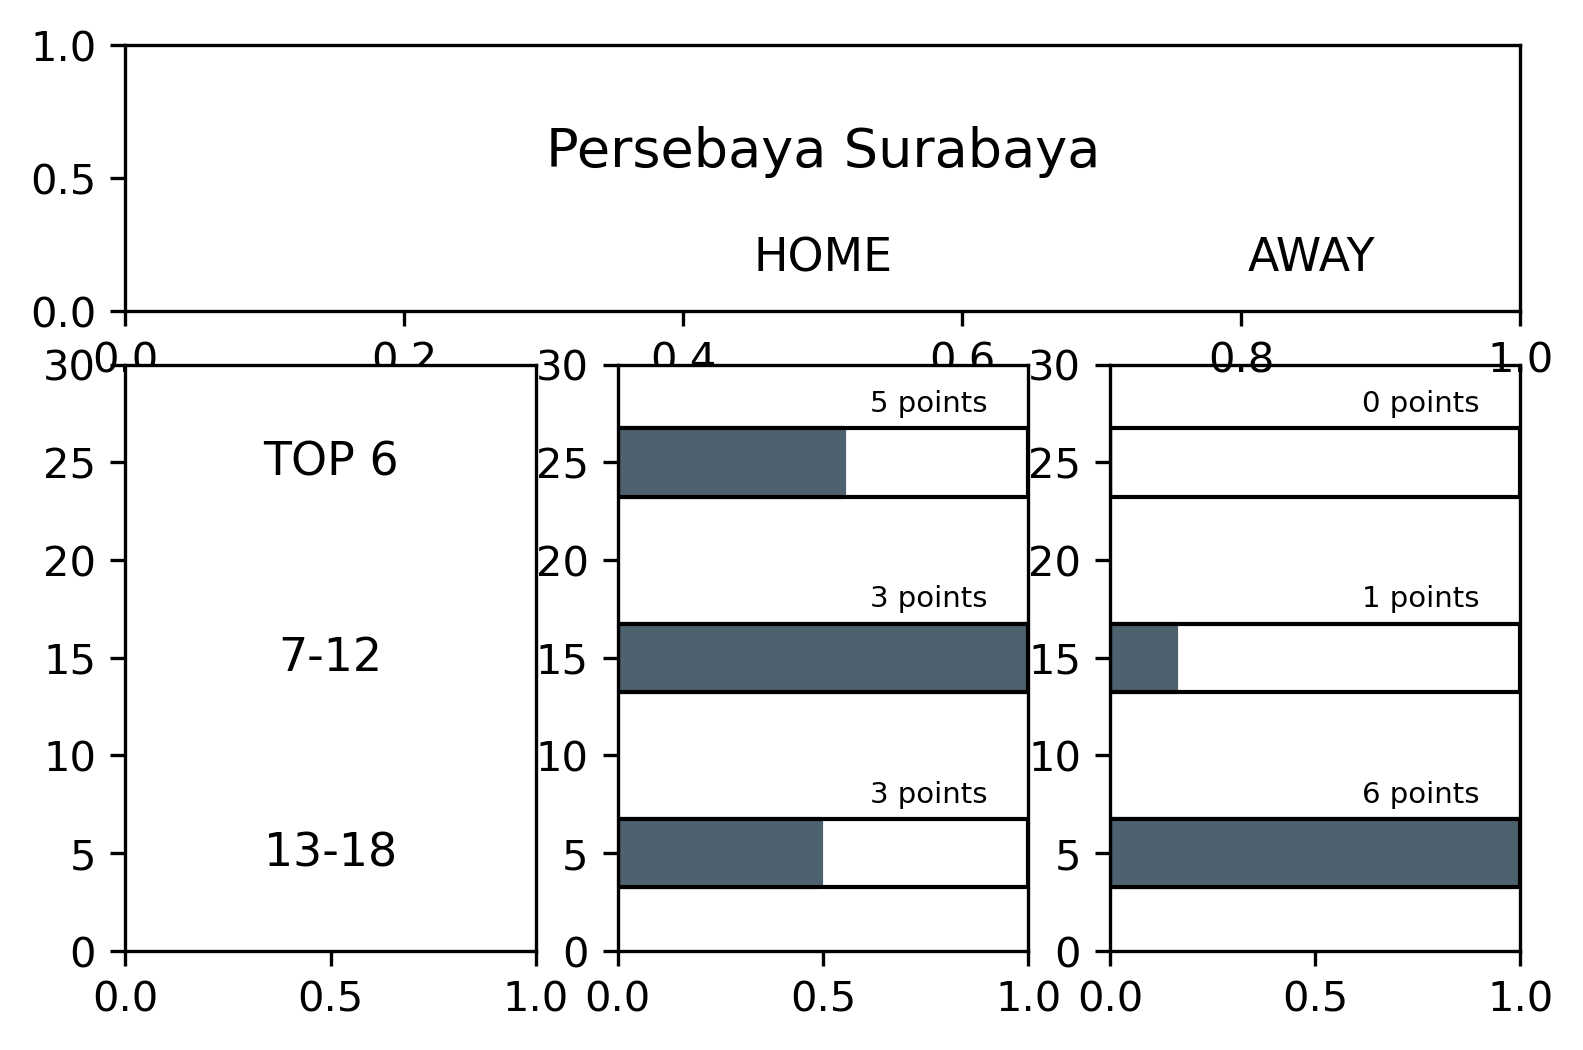

In [43]:
fig = p.figure(dpi=300, facecolor='white')

p.tight_layout(pad=.1)

ax_dict = fig.subplot_mosaic(
    layout
)
#for apa in ['text', 'pos', 'hbar', 'abar']:#
 #   ax_dict[apa].axis('off')

ax_dict['text'].annotate(
    xy = (.5,.6),
    text = iy,
    ha = 'center',
    va = 'center',
    size = 13
)

ax_dict["text"].annotate(
    xy = (.5,.2),
    text = "HOME",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["text"].annotate(
    xy = (.85,.2),
    text = "AWAY",
    ha = "center",
    va = "center",
    size = 11
)

ax_dict["pos"].set_ylim([0, 30])
ax_dict["pos"].annotate(
    xy = (.5,25),
    text = "TOP 6",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["pos"].annotate(
    xy = (.5,15),
    text = "7-12",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["pos"].annotate(
    xy = (.5,5),
    text = "13-18",
    ha = "center",
    va = "center",
    size = 11
)

ax_dict["hbar"].set_ylim([0, 30])
ax_dict["hbar"].set_xlim([0, 1])

ax_dict["abar"].set_ylim([0, 30])
ax_dict["abar"].set_xlim([0, 1])

for i, j in zip ([25, 15, 5], [0, 1, 2]):
    ax_dict["hbar"].barh(
        y = i,
        width = 1,
        height = 3.5,
        color = 'none',
        edgecolor = 'k'
        #linewidth = 1.3
    )
    ax_dict["hbar"].fill_between(
        x = [0,(hpefr[j]/hpewdt[j])-.005],
        y1 = i+1.75,
        y2 = i-1.75,
        color = '#4e616e'
    )
    ax_dict['hbar'].annotate(
        xy = (.9, (i + 2.3)),
        text = str(hpefr[j])+' points',
        ha = 'right',
        va = 'bottom',
        size = 7
    )

    ax_dict["abar"].barh(
        y = i,
        width = 1,
        height = 3.5,
        color = 'none',
        edgecolor = 'k'
    )
    ax_dict["abar"].fill_between(
        x = [0,(apefr[j]/apewdt[j])-.005],
        y1 = i+1.75,
        y2 = i-1.75,
        color = '#4e616e'
    )
    
    ax_dict['abar'].annotate(
        xy = (.9, (i + 2.3)),
        text = str(apefr[j])+' points',
        ha = 'right',
        va = 'bottom',
        size = 7
    )